MLE Homework #6 Travis Johnson 662018371

#Problem 1

#Part A

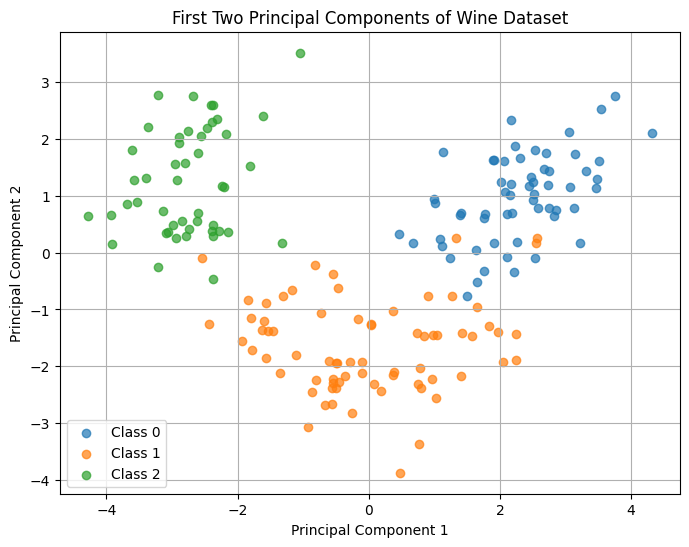

In [1]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# Loading the Wine dataset
data = load_wine()
X = data.data
y = data.target
feature_names = data.feature_names

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Creating a DataFrame for visualization
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Target'] = y

# Plotting the first two principal components
plt.figure(figsize=(8, 6))
for label in df_pca['Target'].unique():
    plt.scatter(df_pca[df_pca['Target'] == label]['PC1'],
                df_pca[df_pca['Target'] == label]['PC2'],
                label=f"Class {label}", alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('First Two Principal Components of Wine Dataset')
plt.legend()
plt.grid(True)
plt.show()


#Part B

In [2]:
# Variance ratio for the first two principal components
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio of the first two principal components:")
print(f"PC1: {explained_variance_ratio[0]:.4f}")
print(f"PC2: {explained_variance_ratio[1]:.4f}")


Explained variance ratio of the first two principal components:
PC1: 0.3620
PC2: 0.1921


#Part C

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Splitting the PCA data
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.4, random_state=42, stratify=y
)

# Training the SVM classifier
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

# Making predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluating
print("SVM Classifier Results on PCA-transformed data:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


SVM Classifier Results on PCA-transformed data:
Accuracy: 0.9444444444444444

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        24
           1       0.93      0.93      0.93        29
           2       1.00      1.00      1.00        19

    accuracy                           0.94        72
   macro avg       0.95      0.95      0.95        72
weighted avg       0.94      0.94      0.94        72



#Part D

In [4]:
from sklearn.tree import DecisionTreeClassifier

# Splitting the standardized data
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(
    X_scaled, y, test_size=0.4, random_state=42, stratify=y
)

# Training Decision Tree
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train_dt, y_train_dt)

# Predicting
y_pred_dt = dt_model.predict(X_test_dt)

# Comparing with SVM
print("Decision Tree Classifier Results (Original Features):")
print("Accuracy:", accuracy_score(y_test_dt, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test_dt, y_pred_dt))


Decision Tree Classifier Results (Original Features):
Accuracy: 0.9861111111111112

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.97      0.98        29
           2       1.00      1.00      1.00        19

    accuracy                           0.99        72
   macro avg       0.99      0.99      0.99        72
weighted avg       0.99      0.99      0.99        72



#Part E

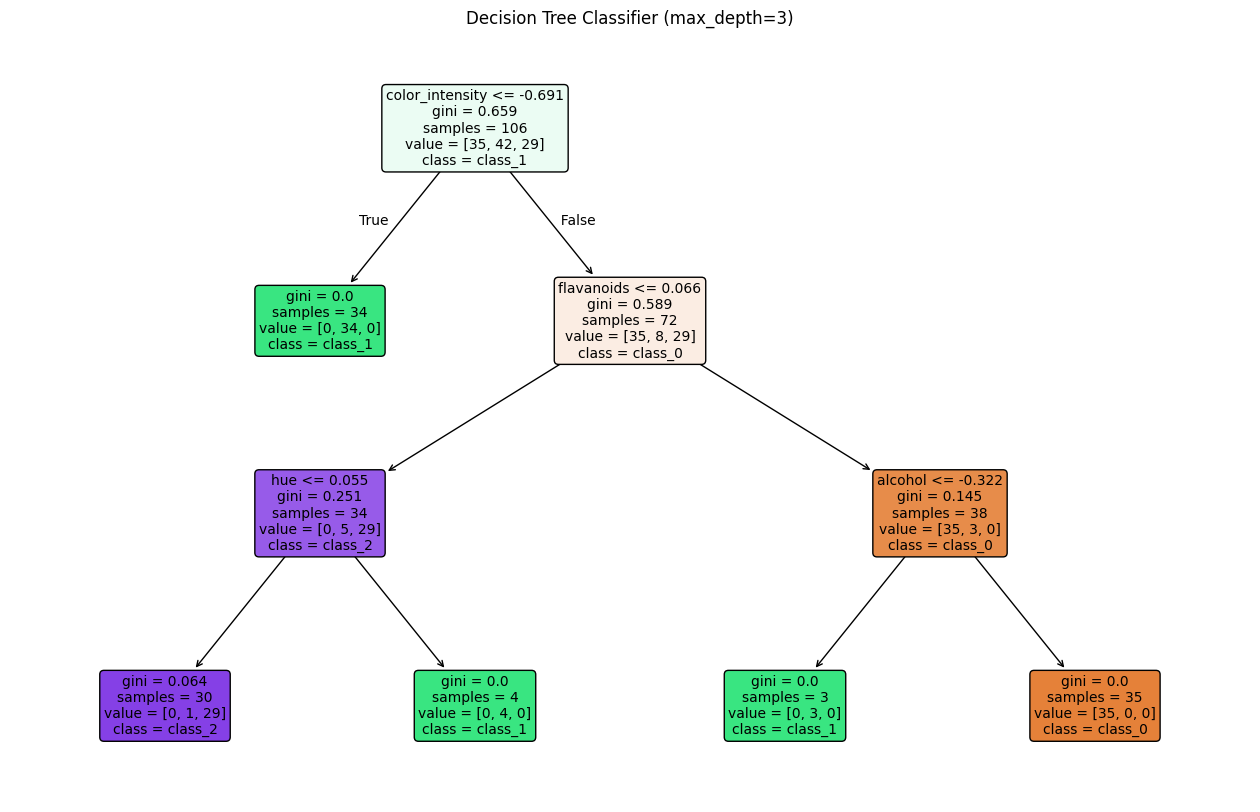

In [5]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plotting the decision tree
plt.figure(figsize=(16, 10))
plot_tree(
    dt_model,
    feature_names=feature_names,
    class_names=data.target_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Classifier (max_depth=3)")
plt.show()


#Problem 2

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


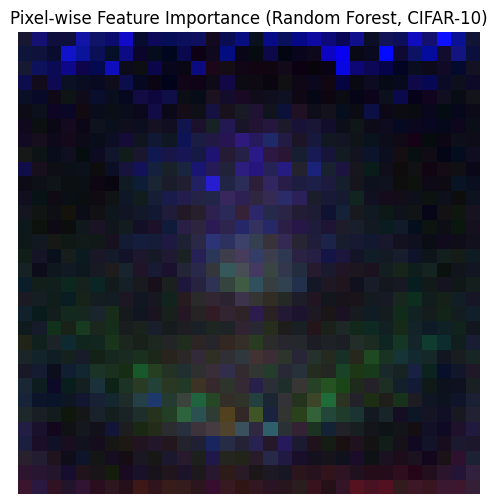

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

# Loading CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Combining train and test sets
X = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0).flatten()

# Reshaping images
X_flat = X.reshape(X.shape[0], -1)

# Training
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_flat, y)

# Getting feature importances
importances = rf.feature_importances_

# Reshaping
importance_img = importances.reshape(32, 32, 3)

# Normalizing
importance_img_norm = (importance_img - importance_img.min()) / (importance_img.max() - importance_img.min())

# Plotting
plt.figure(figsize=(6, 6))
plt.imshow(importance_img_norm)
plt.title("Pixel-wise Feature Importance (Random Forest, CIFAR-10)")
plt.axis('off')
plt.show()


#Problem 3

In [7]:
from google.colab import drive
import numpy as np

# Mount Google Drive
drive.mount('/content/drive')

# Loading  data
file_path = '/content/drive/MyDrive/MLE Colab Notebooks/surface_temp.npy'
temperature_data = np.load(file_path)

# Previewing
print("Shape of temperature data:", temperature_data.shape)
print("First 10 timesteps:", temperature_data[:10])


Mounted at /content/drive
Shape of temperature data: (1000,)
First 10 timesteps: [370.3499701  370.65259997 372.77770567 374.20878713 373.85554369
 373.35876556 373.01146637 373.61196473 373.73017769 374.00751705]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

data = temperature_data.reshape(-1, 1)

# Normalizing the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Preparing sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length - 10):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length:i+seq_length+10])
    return np.array(X), np.array(y)

SEQ_LEN = 50  # use previous 50 steps to predict next 10
X, y = create_sequences(data_scaled, SEQ_LEN)

# Splitting into train/test
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Building the LSTM model
model = Sequential([
    LSTM(64, input_shape=(SEQ_LEN, 1)),
    Dense(10)  # output 10 future timesteps
])
model.compile(optimizer='adam', loss='mse')
model.summary()

# Training the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,546 (68.54 KB)

 Trainable params: 17,546 (68.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.4999 - val_loss: 0.0515
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0396 - val_loss: 0.0359
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0317 - val_loss: 0.0363
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0286 - val_loss: 0.0352
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0327 - val_loss: 0.0345
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0269 - val_loss: 0.0342
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0283 - val_loss: 0.0339
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0296 - val_loss: 0.0340
Epoch 9/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0287 - val_loss: 0.0340
Epoch 10/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0293 - val_loss: 0.0340
Epoch 11/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0291 - val_loss: 0.0343
Epoch 12/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


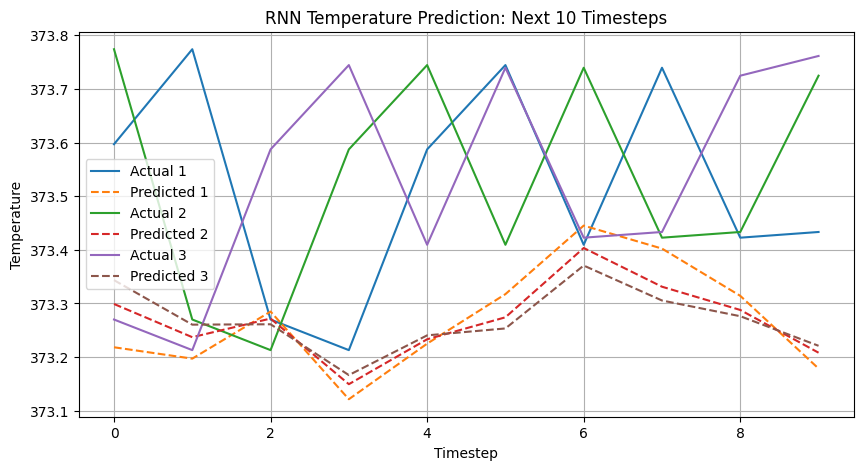

In [9]:
# Predicting on test set
y_pred = model.predict(X_test)

# Calculating temperature values
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 10))

# Plotting predictions
plt.figure(figsize=(10, 5))
for i in range(3):
    plt.plot(y_test_inv[i], label=f"Actual {i+1}")
    plt.plot(y_pred_inv[i], '--', label=f"Predicted {i+1}")
plt.title("RNN Temperature Prediction: Next 10 Timesteps")
plt.xlabel("Timestep")
plt.ylabel("Temperature")
plt.legend()
plt.grid(True)
plt.show()
